In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pycountry_convert as pc
import os
import geoplot
import geopandas
import pycountry
from github import Github
from datetime import datetime, timedelta
from functools import reduce

plt.rcParams["figure.figsize"] = (16, 10)

In [122]:
combined_dataframe_name = "combined_df.csv"
df = pd.read_csv(combined_dataframe_name, index_col=0, header=[0, 1])
df.head()

2020-03-08 00:00:00                                 \
                        confirmed deaths recovered active tweets   
Aruba                           0      0         0      0    105   
Afghanistan                     4      0         0      4    252   
Angola                          0      0         0      0    191   
Anguilla                        0      0         0      0     15   
Åland Islands                   0      0         0      0     24   

              2020-03-09 00:00:00                                 ...  \
                        confirmed deaths recovered active tweets  ...   
Aruba                           0      0         0      0    227  ...   
Afghanistan                     4      0         0      4    458  ...   
Angola                          0      0         0      0    360  ...   
Anguilla                        0      0         0      0     22  ...   
Åland Islands                   0      0         0      0     40  ...   

              2020-04-10 00:00:00                                 \
                        confirmed deaths recovered active tweets   
Aruba                           4      0         0      4   2752   
Afghanistan                   521     15        32    474  13636   
Angola                         19      2         2     15  10614   
Anguilla                        0      0         0      0    354   
Åland Islands                   0      0         0      0    708   

              2020-04-11 00:00:00                                 
                        confirmed deaths recovered active tweets  
Aruba                           4      0         0      4   2817  
Afghanistan                   555     18        32    505  14158  
Angola                         19      2         4     13  10850  
Anguilla                        0      0         0      0    389  
Åland Islands                   0      0         0      0    755  

[5 rows x 175 columns]

In [198]:
def plot_for_regions(regions_list, plot_confirmed=True, plot_deaths=True, plot_recoveries=True, plot_active=False, plot_tweets=True):
    if len(regions_list) == 0:
        selected_regions_stats = df.sum()
    else:
        selected_regions_stats = df.reindex(regions_list).sum()
    confirmed = list(selected_regions_stats[:, 'confirmed'])
    deaths = list(selected_regions_stats[:, 'deaths'])
    recovered = list(selected_regions_stats[:, 'recovered'])
    active = list(selected_regions_stats[:, 'active'])
    tweets = list(selected_regions_stats[:, 'tweets'])
    
    dates = np.unique(df.columns.get_level_values(0))
    dates = [datetime.strptime(dates[i], '%Y-%m-%d %H:%M:%S') for i in range(len(dates))]

    fig, ax = plt.subplots(1, 1)
    if len(regions_list) == 0:
        ax.set_title('COVID data for whole Earth')
    elif len(regions_list) == 1:
        ax.set_title('COVID data for ' + str(regions_list[0]))
    else:
        ax.set_title('COVID data for countries: ' + reduce(lambda acc, val: acc + ', ' + val if acc != "" else val, regions_list, ""))

    ax.set_xlabel('Date')
    ax.set_ylabel('Number of cases')
        
    if plot_confirmed:
        ax.plot(dates, confirmed, 'o-', c='gold', label='confirmed cases')
    if plot_deaths:
        ax.plot(dates, deaths, 'o-', c='red', label='deaths')
    if plot_recoveries:
        ax.plot(dates, recovered, 'o-', c='green', label='recoveries')
    if plot_active:
        ax.plot(dates, active, 'o-', c='pink', label='active cases')
    
    if plot_tweets:
        ax_tweets = ax.twinx()
        ax_tweets.set_ylabel('Number of tweets')
        ax_tweets.plot(dates, tweets, 'o-', c='lightblue', label='tweets sent')
        ax_tweets.legend(loc=1)
    
    ax.legend(loc=2)
    plt.show()

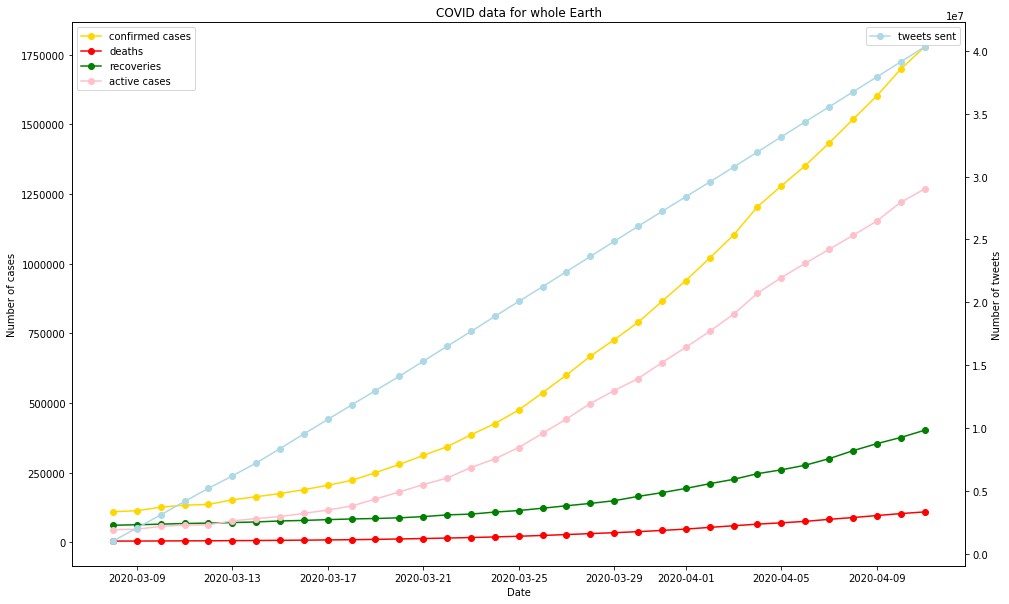

In [199]:
plot_for_regions([], plot_active=True)

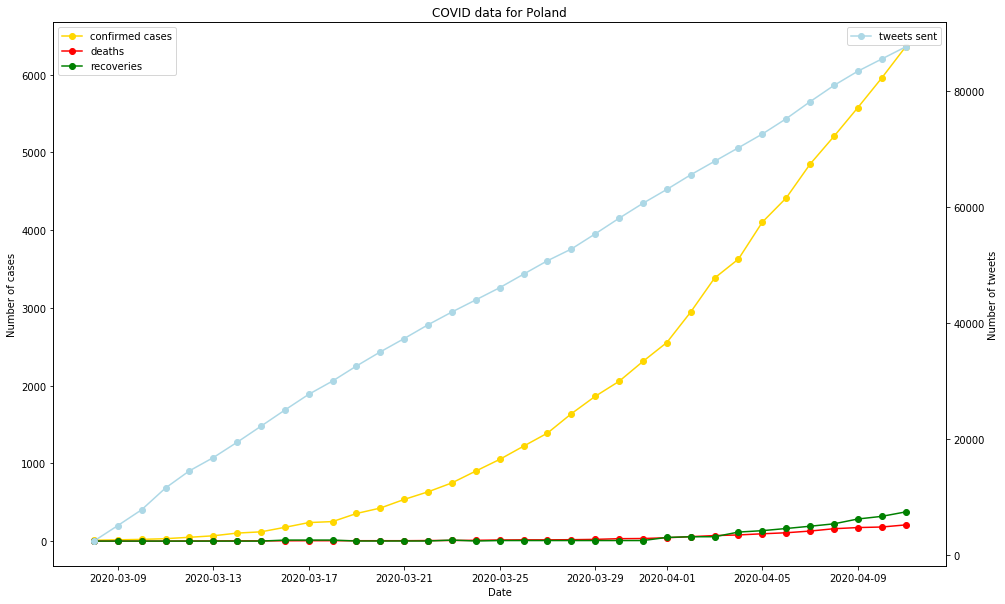

In [200]:
plot_for_regions(['Poland'])

In [201]:
def barplot_for_regions(regions_list, plot_tweets='dot'):
    if len(regions_list) == 0:
        selected_regions_stats = df.sum()
    else:
        selected_regions_stats = df.reindex(regions_list).sum()
    confirmed = list(selected_regions_stats[:, 'confirmed'])
    deaths = list(selected_regions_stats[:, 'deaths'])
    recovered = list(selected_regions_stats[:, 'recovered'])
    active = list(selected_regions_stats[:, 'active'])
    tweets = list(selected_regions_stats[:, 'tweets'])
    
    dates = np.unique(df.columns.get_level_values(0))
    dates = np.array([datetime.strptime(dates[i], '%Y-%m-%d %H:%M:%S') for i in range(len(dates))])

    fig, ax = plt.subplots(1, 1)
    if len(regions_list) == 0:
        ax.set_title('COVID data for whole Earth')
    elif len(regions_list) == 1:
        ax.set_title('COVID data for ' + str(regions_list[0]))
    else:
        ax.set_title('COVID data for countries: ' + reduce(lambda acc, val: acc + ', ' + val if acc != "" else val, regions_list, ""))

    ax.set_xlabel('Date')
    ax.set_ylabel('Number of cases')
        
    width = timedelta(hours=10) if plot_tweets == 'bar' else 0.8
        
    ax.bar(dates, deaths, width=width, color='red', label='deaths')
    ax.bar(dates, active, width=width, color='pink', bottom=deaths, label='active cases')
    active_and_deaths = np.array(active) + np.array(deaths)
    ax.bar(dates, recovered, width=width, color='green', bottom=active_and_deaths, label='recoveries')
    
    if plot_tweets == 'bar':
        ax_tweets = ax.twinx()
        ax_tweets.set_ylabel('Number of tweets')
        ax_tweets.bar(dates + width, tweets, width=width, color='lightblue', label='tweets sent')
        ax_tweets.legend(loc=1)  
    elif plot_tweets == 'dot':
        ax_tweets = ax.twinx()
        ax_tweets.set_ylabel('Number of tweets')
        ax_tweets.plot(dates, tweets, 'o', c='lightblue', label='tweets sent', markersize=10)
        ax_tweets.legend(loc=1)
    
    ax.legend(loc=2)
    plt.show()

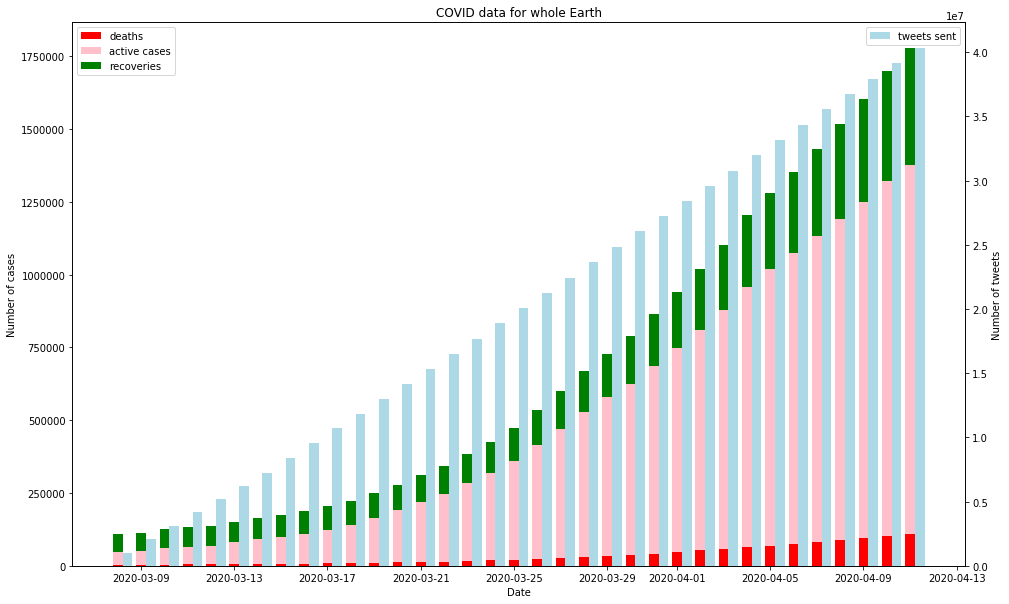

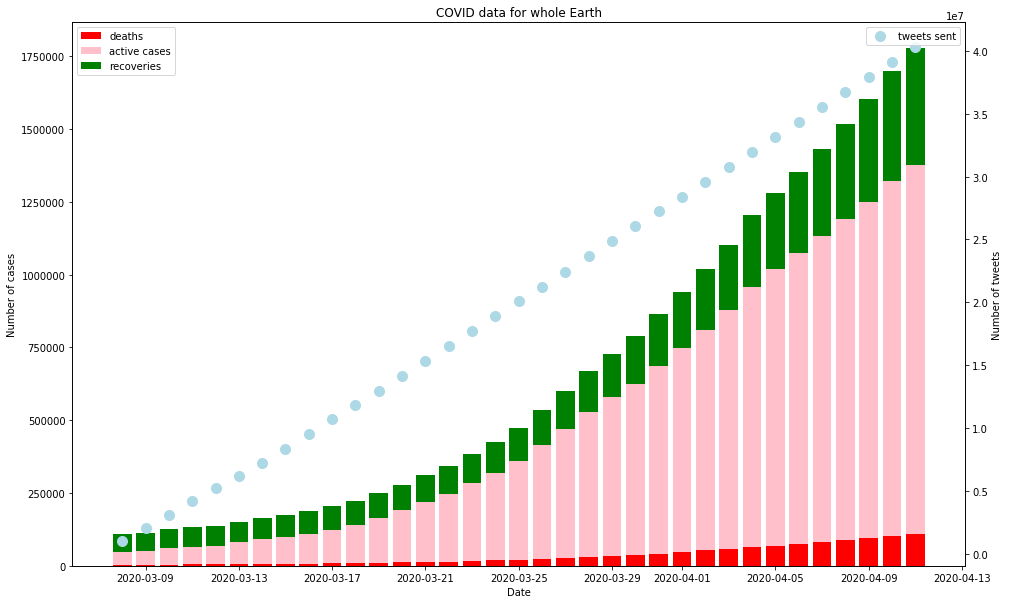

In [203]:
barplot_for_regions([], plot_tweets='bar')
barplot_for_regions([], plot_tweets='dot')

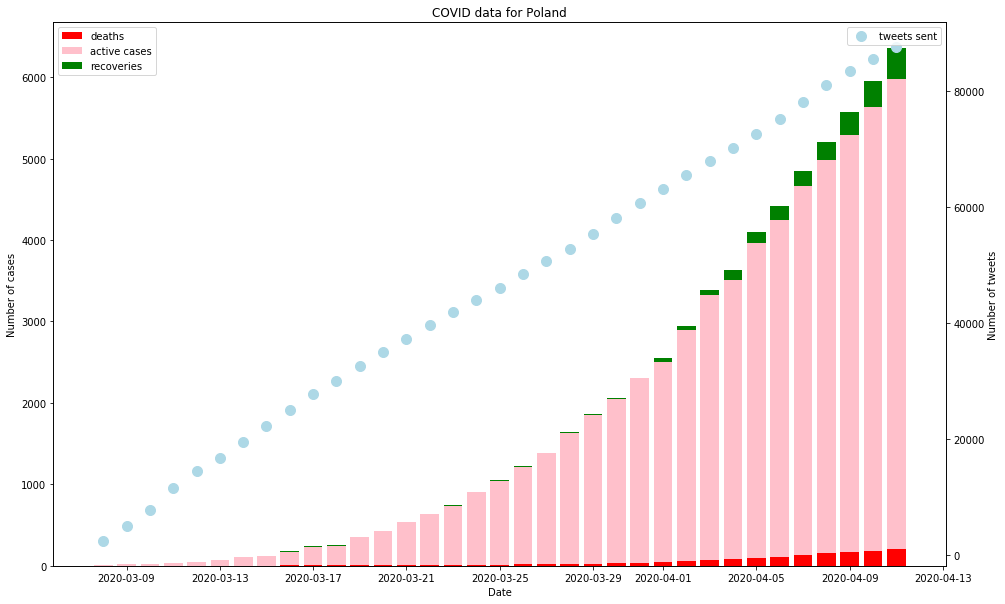

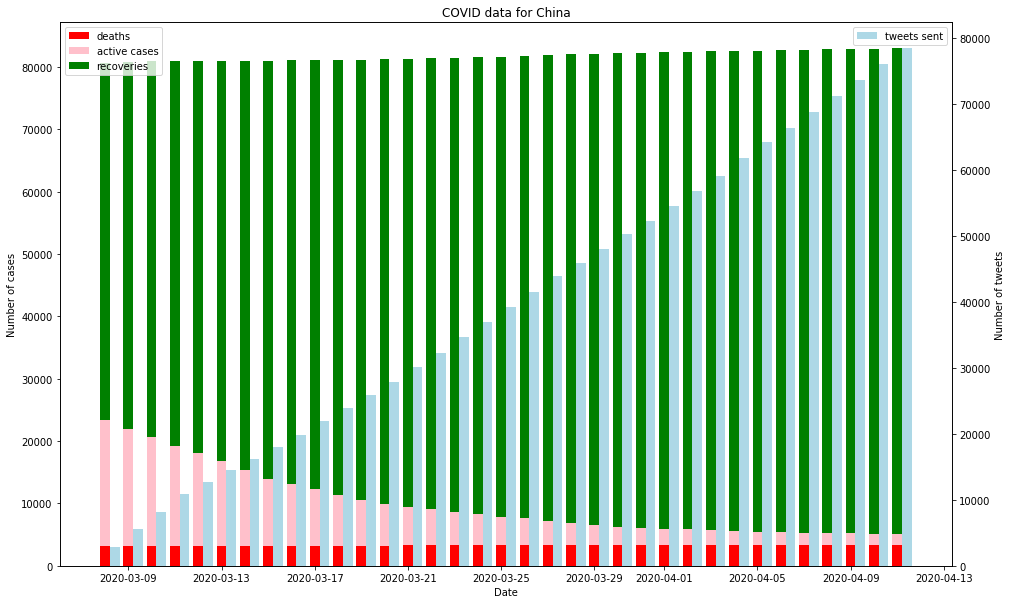

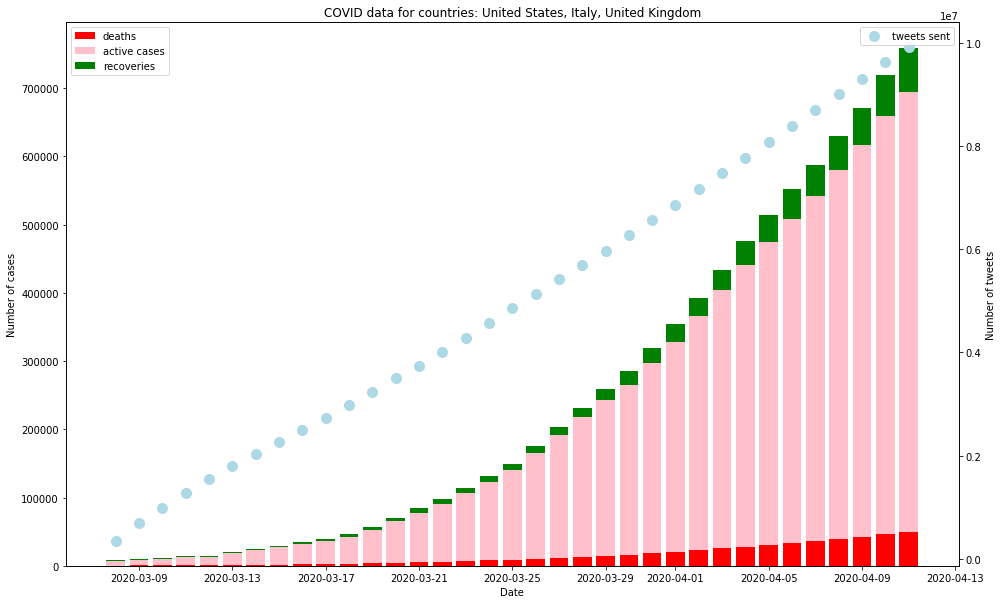

In [207]:
barplot_for_regions(['Poland'], plot_tweets='dot')
barplot_for_regions(['China'], plot_tweets='bar')
barplot_for_regions(['United States', 'Italy', 'United Kingdom'], plot_tweets='dot')